<a href="https://colab.research.google.com/github/Yennakusapraveen/Cloudcredits/blob/main/Myntra_Fashion_Product_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')


In [3]:
df = pd.read_csv("myntra_dataset_ByScraping.csv")
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52120 entries, 0 to 52119
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand_name         52120 non-null  object 
 1   pants_description  52120 non-null  object 
 2   price              52120 non-null  int64  
 3   MRP                52120 non-null  float64
 4   discount_percent   52120 non-null  float64
 5   ratings            52120 non-null  float64
 6   number_of_ratings  52120 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 2.8+ MB


,price,MRP,discount_percent,ratings,number_of_ratings
count,52120.000000,52120.000000,52120.000000,52120.000000,52120.000000
mean,1594.515445,3180.398438,1.648256,3.997794,91.568937
std,1495.972325,2201.883218,4.687529,0.420404,433.918513
min,337.000000,499.000000,0.020000,1.000000,5.000000
25%,989.000000,2499.000000,0.400000,3.800000,16.000000
50%,1439.000000,2999.000000,0.500000,4.000000,35.000000
75%,1829.000000,3499.000000,0.630000,4.200000,74.000000
max,54000.000000,72000.000000,64.000000,5.000000,30700.000000


In [8]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

df.columns


Index(['brand_name', 'pants_description', 'price', 'mrp', 'discount_percent',
       'ratings', 'number_of_ratings'],
      dtype='object')

In [9]:
# remove duplicates
df.drop_duplicates(inplace=True)

# convert numeric columns
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['mrp'] = pd.to_numeric(df['mrp'], errors='coerce')
df['discount_percent'] = pd.to_numeric(df['discount_percent'], errors='coerce')
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['number_of_ratings'] = pd.to_numeric(df['number_of_ratings'], errors='coerce')

df.isnull().sum()


,0
brand_name,0
pants_description,0
price,0
mrp,0
discount_percent,0
ratings,0
number_of_ratings,0


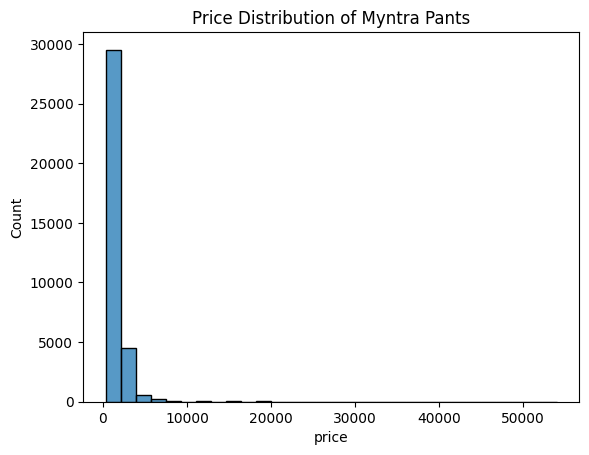

In [10]:
plt.figure()
sns.histplot(df['price'], bins=30)
plt.title("Price Distribution of Myntra Pants")
plt.show()


In [11]:
df['brand_name'].value_counts().head(10)



,count
brand_name,
United Colors of Benetton,3300
Flying Machine,2576
Roadster,1796
SPYKAR,1149
WROGN,1101
U.S. Polo Assn. Denim Co.,850
V-Mart,800
glitchez,784
Pepe Jeans,659


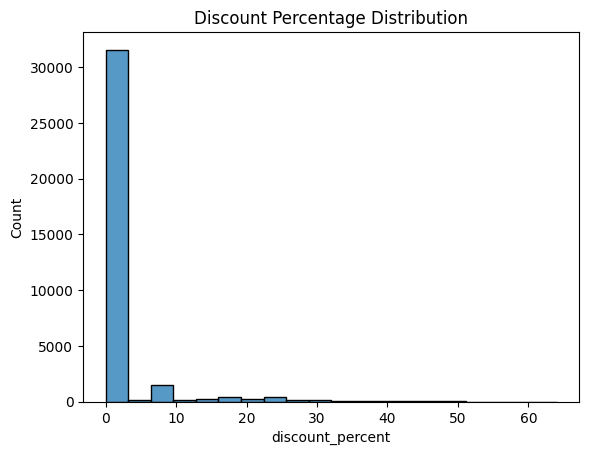

In [12]:
plt.figure()
sns.histplot(df['discount_percent'], bins=20)
plt.title("Discount Percentage Distribution")
plt.show()


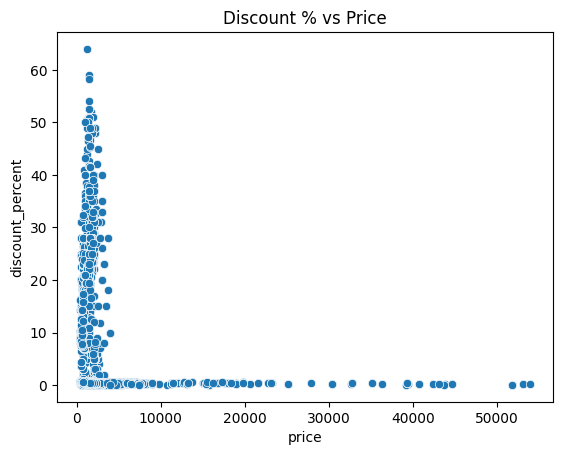

In [13]:
plt.figure()
sns.scatterplot(x='price', y='discount_percent', data=df)
plt.title("Discount % vs Price")
plt.show()


In [14]:
df.groupby('brand_name')['discount_percent'] \
  .mean() \
  .sort_values(ascending=False) \
  .head(10)


,discount_percent
brand_name,
BEVDAAS,37.880000
Red Tape,33.608857
L'monte,33.060000
W.T.F - Witnessing True Fashion,32.450000
Colors and Blends,30.000000
RIG BONE,29.236667
DRAGAON,28.450000
mode de base,26.828182
Minus One,26.000000


In [15]:
df.groupby('brand_name')['number_of_ratings'] \
  .sum() \
  .sort_values(ascending=False) \
  .head(10)


,number_of_ratings
brand_name,
Roadster,531598
United Colors of Benetton,366608
HIGHLANDER,325024
Flying Machine,275393
WROGN,148323
Levis,105740
The Indian Garage Co,94793
HERE&NOW,80890
Urbano Fashion,80448


In [16]:
print("""
KEY BUSINESS INSIGHTS:
1. Budget brands offer higher discount percentages.
2. Majority of pants are priced between ₹500–₹2000.
3. A few brands dominate product listings.
4. Higher discounts do not always guarantee higher ratings.
5. Customer popularity is driven more by brand trust than price cuts.
""")



KEY BUSINESS INSIGHTS:
1. Budget brands offer higher discount percentages.
2. Majority of pants are priced between ₹500–₹2000.
3. A few brands dominate product listings.
4. Higher discounts do not always guarantee higher ratings.
5. Customer popularity is driven more by brand trust than price cuts.

